In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.environ["PYQULAROOT"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'coolwarm'

import numpy as np

# Electronic structure of graphene
Here we will first compute the electronic structure of graphene, modeled with a single orbital per site

## Infinite two-dimensional graphene
First, we will consider a two-dimensional honeycomb lattice that is infinite in both directions

(-8.8, 8.8, -4.763139720814412, 4.763139720814412)

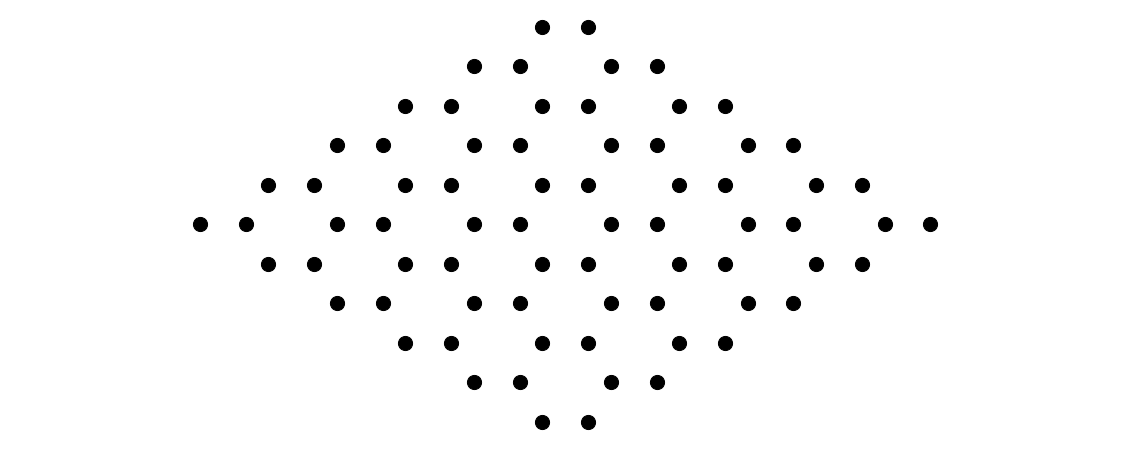

In [2]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
gs = g.get_supercell((6,6)) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

([], [])

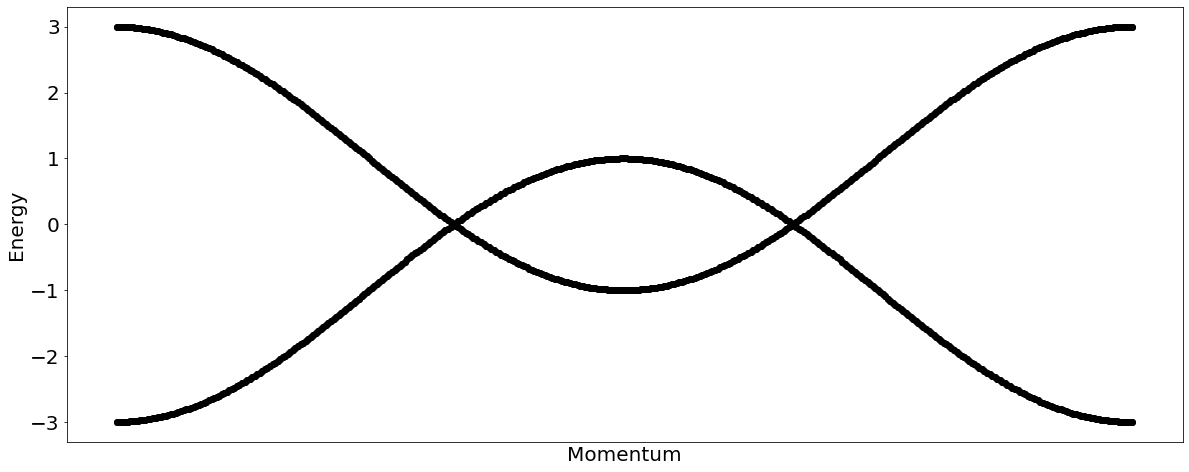

In [3]:
# now compute the band structure
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

([], [])

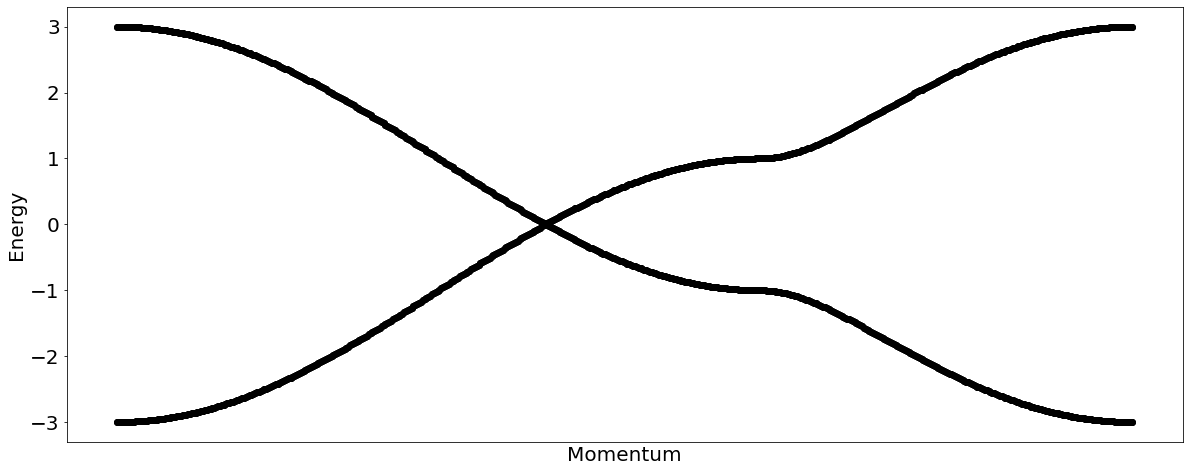

In [4]:
# we can also compute the band structure in a different kpath
(k,e) = h.get_bands(kpath=["G","K","M","G"]) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

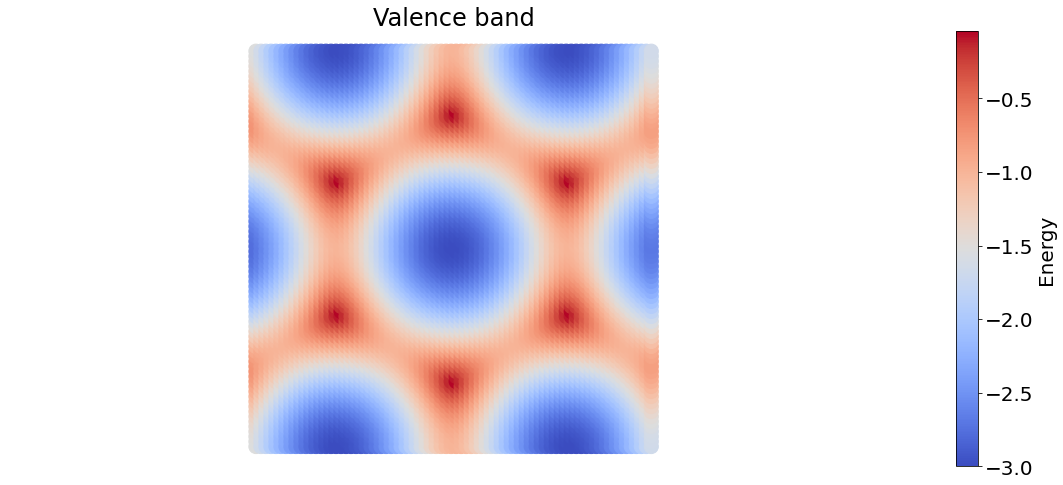

In [5]:
# we can also compute the band structure the 2d Brillouin zone
(k,e) = h.get_bands_map(n=0,nk=80) # lowest state
plt.title("Valence band")
plt.scatter(k[:,0],k[:,1],c=e,s=200) ; plt.axis("off") ; plt.axis("equal") ; plt.colorbar(label="Energy")

Text(0, 0.5, 'DOS')

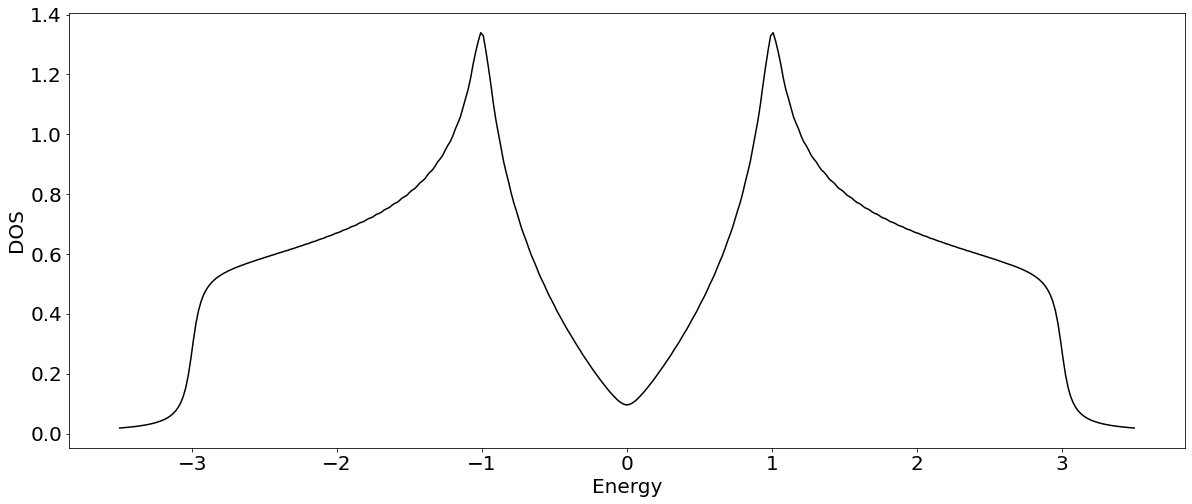

In [6]:
# we can also compute the total density of states
(e,d) = h.get_dos(delta=5e-2,energies=np.linspace(-3.5,3.5,400)) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot

## Graphene nanoribbons
We now focus on considering nanoribbons, systems with a finite width and infinite in the x-direction

(-32.725, 32.725, -9.049965469547384, 9.049965469547384)

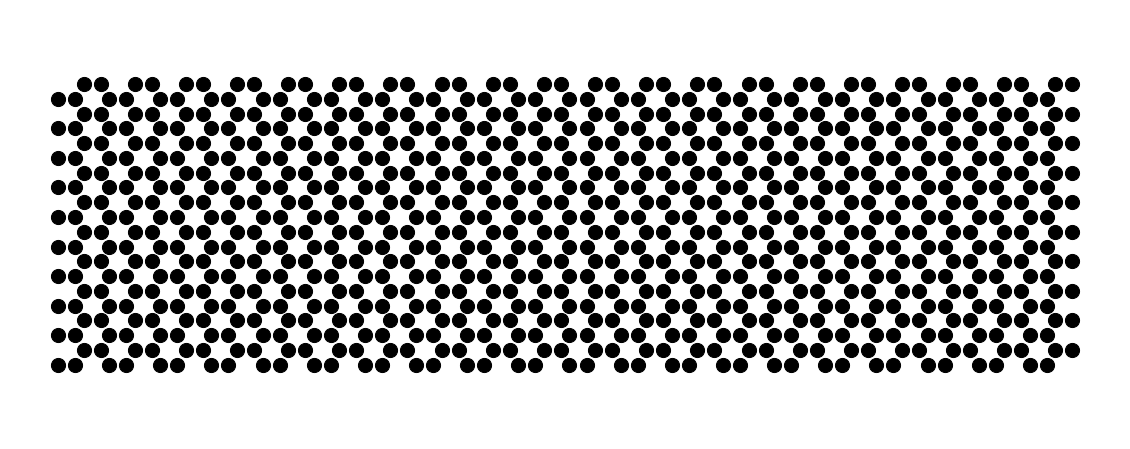

In [7]:
g = geometry.honeycomb_armchair_ribbon(10) # generate a honeycomb lattice
gs = g.get_supercell(20) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

([], [])

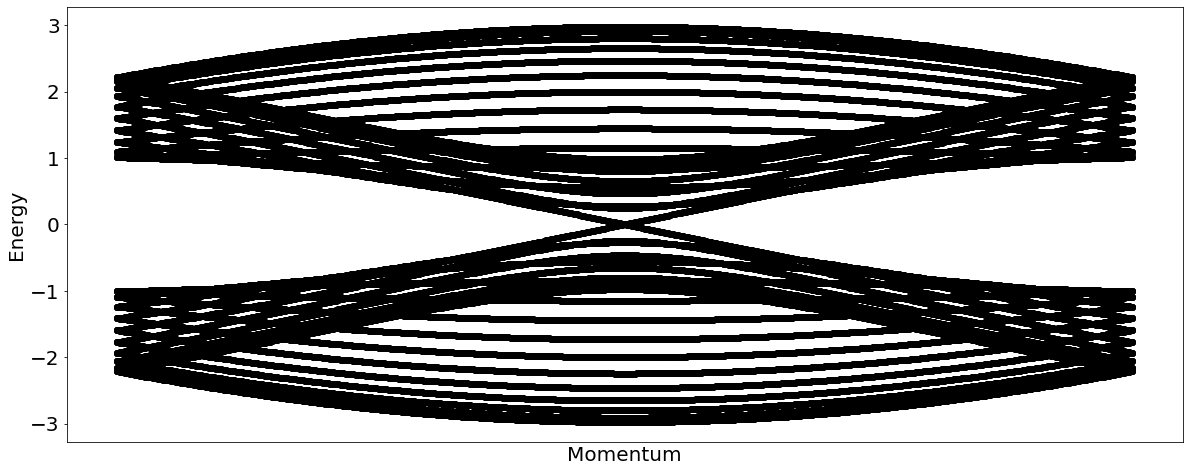

In [8]:
# now compute the band structure
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands(kpath=["M","G","M"]) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

Now we will compute the density of states of graphene nanoribbon, and see that it resembles the one of two simensional graphene

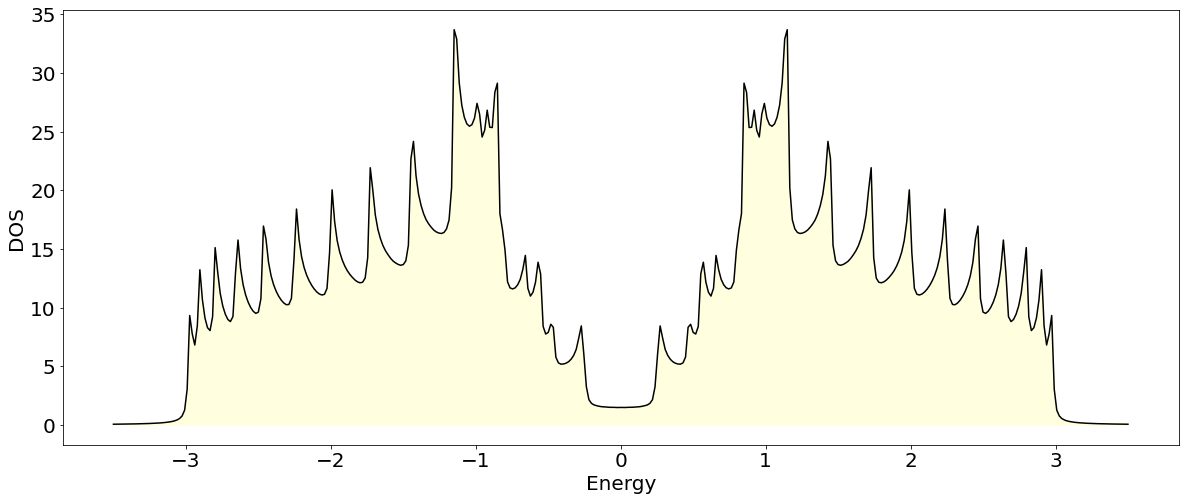

In [9]:
(e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400),nk=300) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

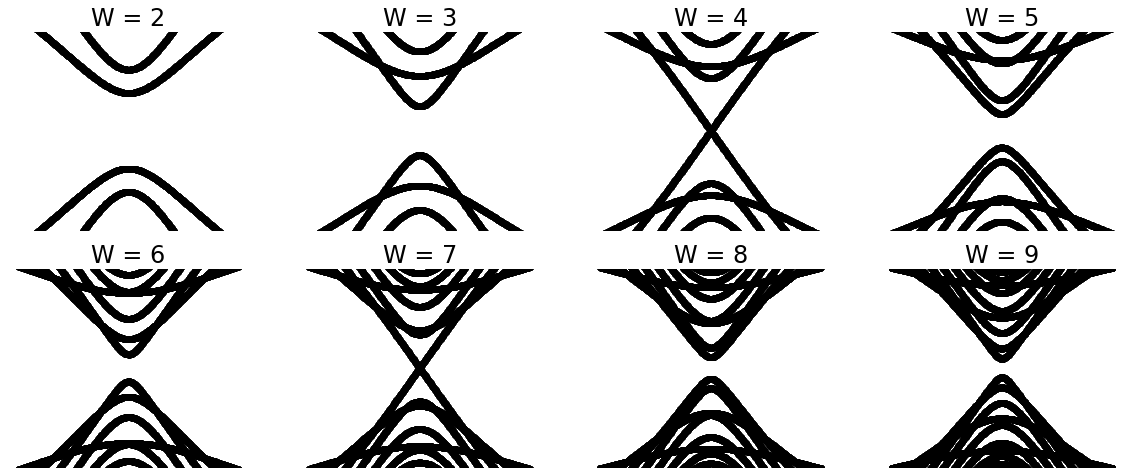

In [10]:
# plot the bands for different widths
ns = range(2,10,1) # widths
ij = 0 # counter
for n in ns: # loop over widths
    g = geometry.honeycomb_armchair_ribbon(n) # generate ribbon
    h = g.get_hamiltonian() # get the Hamiltonian
    (k,e) = h.get_bands(kpath=["M","G","M"]) # compute the bands
    plt.subplot(len(ns)//4,4,ij+1) ; ij +=1 
    plt.scatter(k,e,c="black") ; plt.axis("off") ; plt.ylim([-1,1]) ; plt.title("W = "+str(n)) # plot

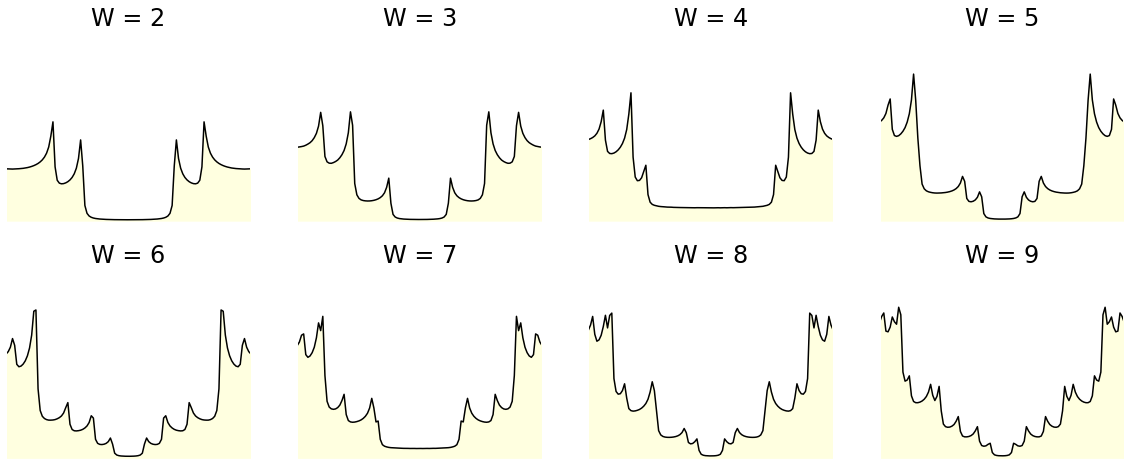

In [11]:
# plot the DOS for different widths
ns = range(2,10,1) # widths
ij = 0 # counter
for n in ns: # loop over widths
    g = geometry.honeycomb_armchair_ribbon(n) # generate ribbon
    h = g.get_hamiltonian() # get the Hamiltonian
    (e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400),nk=300) # DOS
    plt.subplot(len(ns)//4,4,ij+1) ; ij +=1 
    plt.plot(e,d,c="black") ; plt.axis("off") ; plt.xlim([-1,1]) ; plt.title("W = "+str(n)) # plot
    plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

### Exercise
- Some the nanoribbons are gapless whereas others are gapped. Can you infer which ones are gapless?
- The gap in the gapped nanorribons decreases with the width. Can you infer what is the functional form of the gap as a function of the width, and why?

## Graphene nanoislands
Here we will consider graphene nanoislands containing a finite number of atoms

(-9.915990873331836,
 17.71021950739177,
 -15.949999999999996,
 15.950000000000003)

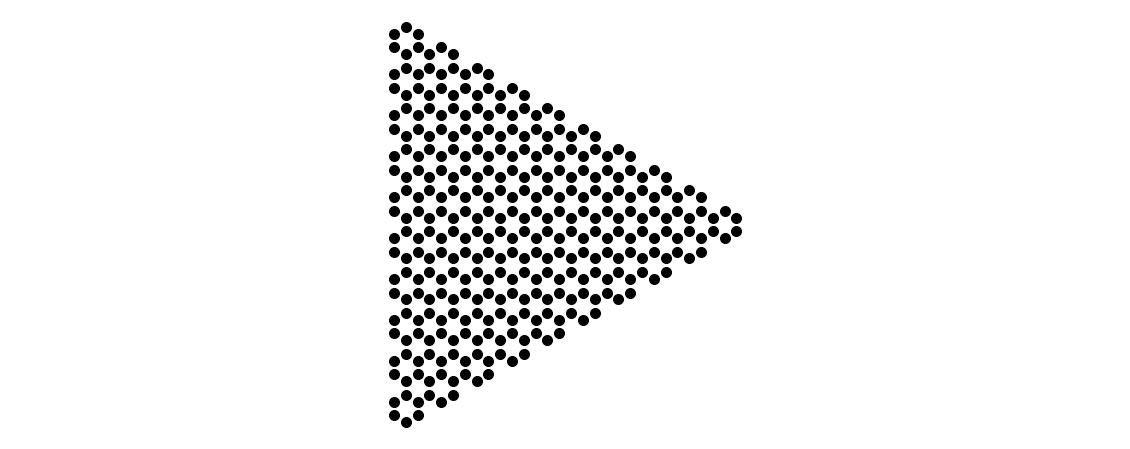

In [12]:
from pyqula import islands # import the islands library
g = islands.get_geometry(name="honeycomb",nedges=3,n=6,rot=np.pi/6.) # honeycomb quantum dot
h = g.get_hamiltonian() # get the Hamiltonian
plt.scatter(g.r[:,0],g.r[:,1],c="black",s=100) ; plt.axis("equal") ; plt.axis("off") 

Text(0, 0.5, 'Energy')

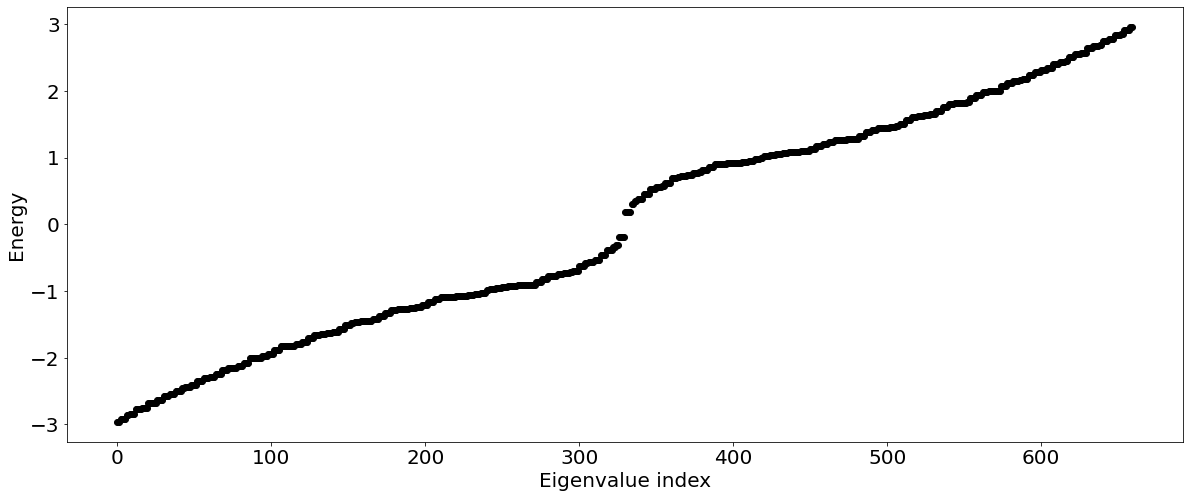

In [13]:
# now plot the eigenstates
(inds,es) = h.get_bands() # get the eigenenergies
plt.scatter(range(len(es)),es,c="black") ; plt.xlabel("Eigenvalue index") ; plt.ylabel("Energy") # plot

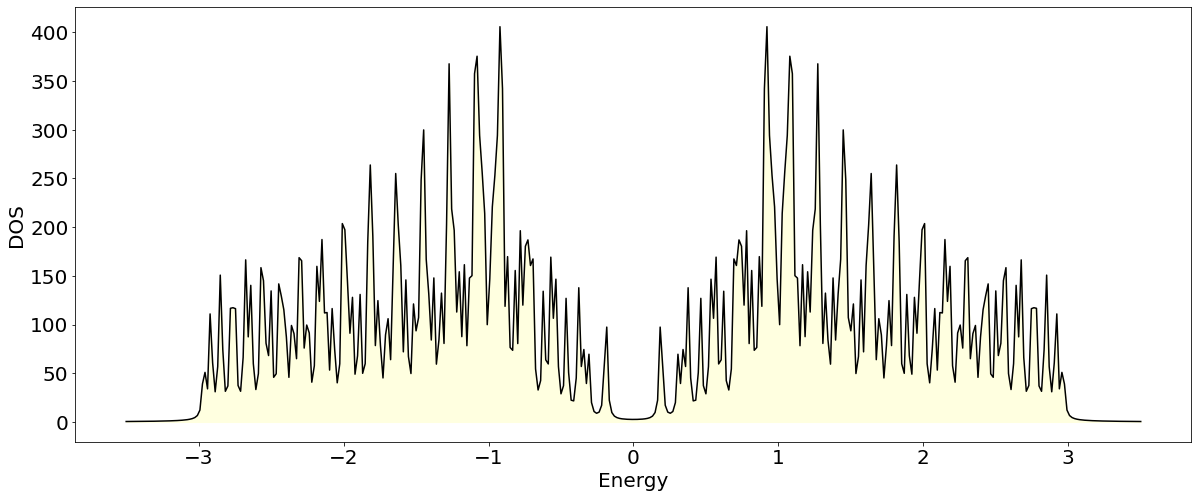

In [14]:
# now compute the density of states
(e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400)) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

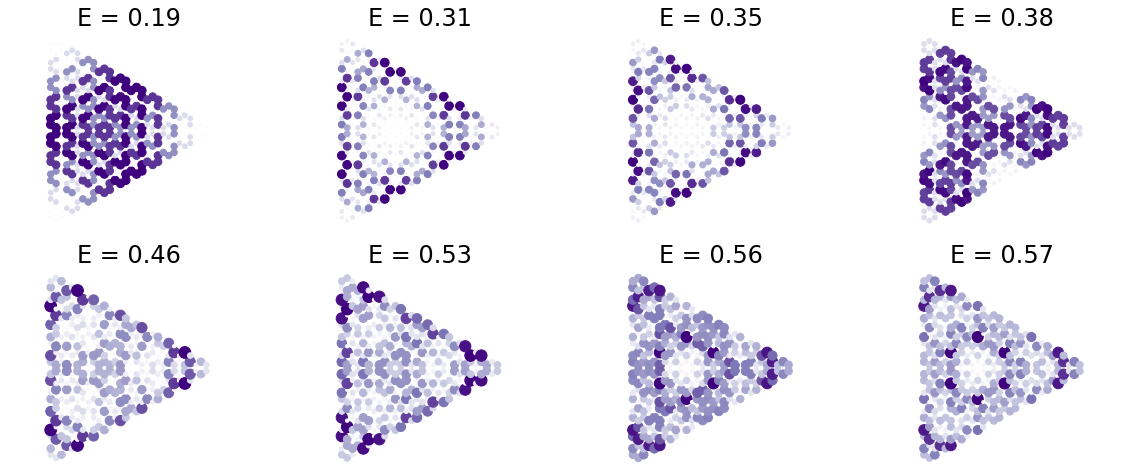

In [15]:
# now compute the LDOS at the valence states closest to zero
ne = 8 # number of energies to consider
(inds,es) = h.get_bands() # get the eigenenergies
es = np.unique(np.round(es,5))
esp = es[es>=0][0:ne] # positive energies
ie = 0 # start counter
for e in esp:
    x,y,d = h.get_ldos(e=e,delta=1e-2) # get the LDOS
    plt.subplot(ne//4,4,ie+1) ; ie +=1  # create a subplot
    plt.scatter(x,y,c=d,s=np.array(d)*100,cmap="Purples") ; plt.axis("off") ; plt.axis("equal") ; plt.title("E = "+str(np.round(e,2)))


### Exercise
- Create a hexagonal quantum dot instead of a triangular one, and show how the confined modes look like

# Interactions
Here we will show how electronic interactions can impact a electronic structure, by addressing some interacting models at the mean-field level

## Phase transition with electronic interactions
We will first address the impact of electronic repulsion in the honeycomb lattice, showing how at a critical value an interaction induced gap emerges

([], [])

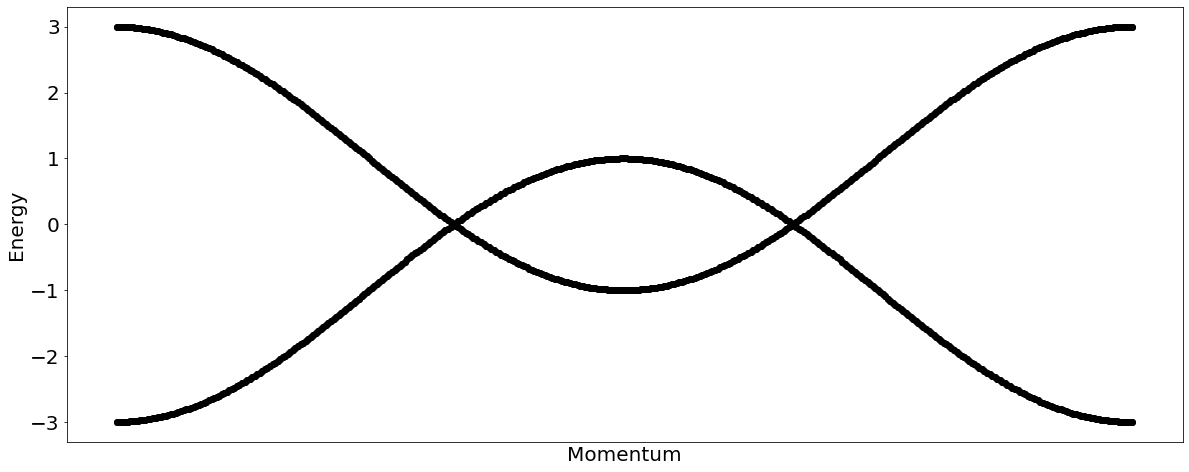

In [16]:
# first plot the mean-field Hamiltonian with no interactions
g = geometry.honeycomb_lattice() # create a honeycomb lattice
h = g.get_hamiltonian() # generate a Hamiltonian
hscf = h.get_mean_field_hamiltonian(U=0.0,filling=0.5,mf="random",mix=0.9) # solve mean-field Hamiltonian
(k,e) = hscf.get_bands() # get bandstructure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

([], [])

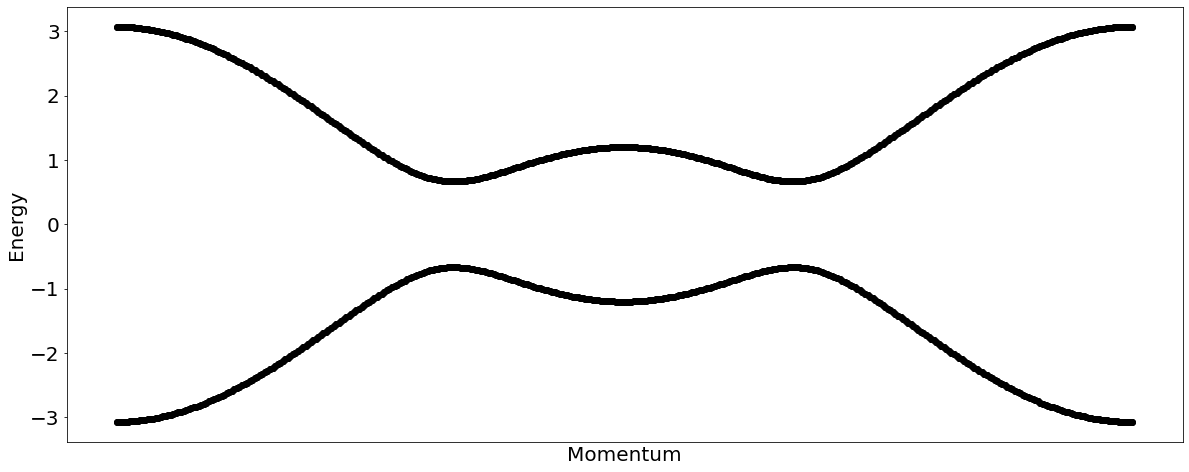

In [17]:
# now include a finite interaction U=3
hscf = h.get_mean_field_hamiltonian(U=3.0,filling=0.5,mf="random",mix=0.9) # solve mean-field Hamiltonian
(k,e) = hscf.get_bands() # get bandstructure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

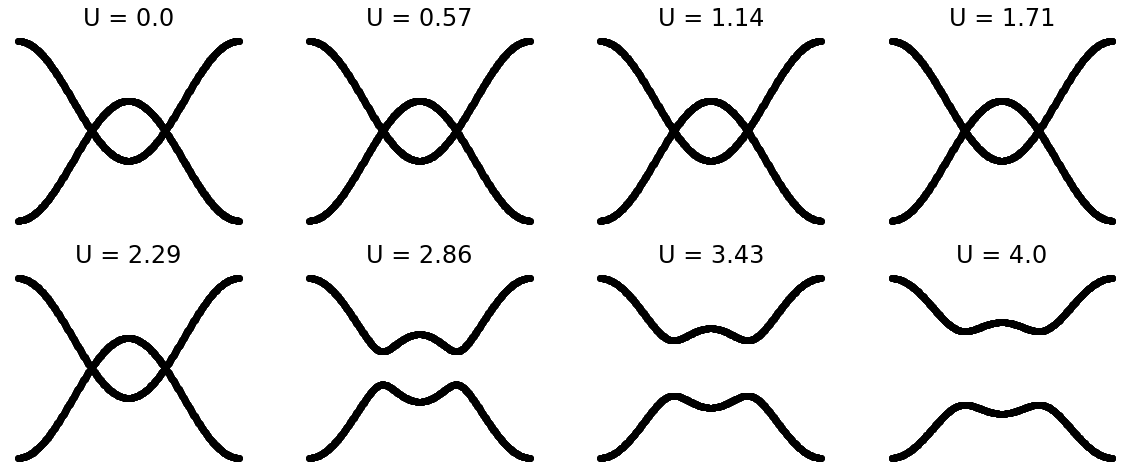

In [18]:
g = geometry.honeycomb_lattice() # create a honeycomb lattice
# We will solve a Hubbard model at the mean-field level
Us = np.linspace(0.,4.0,8) # Hubbard Us considered
iu = 0 # start counter
for U in Us:
    h = g.get_hamiltonian() # generate a Hamiltonian
    hscf = h.get_mean_field_hamiltonian(U=U, filling=0.5,mf="random",mix=0.9) # solve mean-field Hamiltonian
    (k,e) = hscf.get_bands() # get bandstructure
    plt.subplot(len(Us)//4,4,iu+1) ; iu +=1  # create a subplot
    plt.scatter(k,e,c="black") ; plt.axis("off") ; plt.title("U = "+str(round(U,2))) # plot

### Exercise
- Find the critical value of U that gives rise to the gap opening
- What is the symmetry breaking that gives rise to such a gap opening?

## Interaction induced symmetry breaking in quantum dots
Here we will show how in the presence of zero modes, a symmetry breaking can appear for arbitrarily small itneraction strength

(-2.8250000000000015,
 4.324999999999999,
 -3.810511776651531,
 3.8105117766515275)

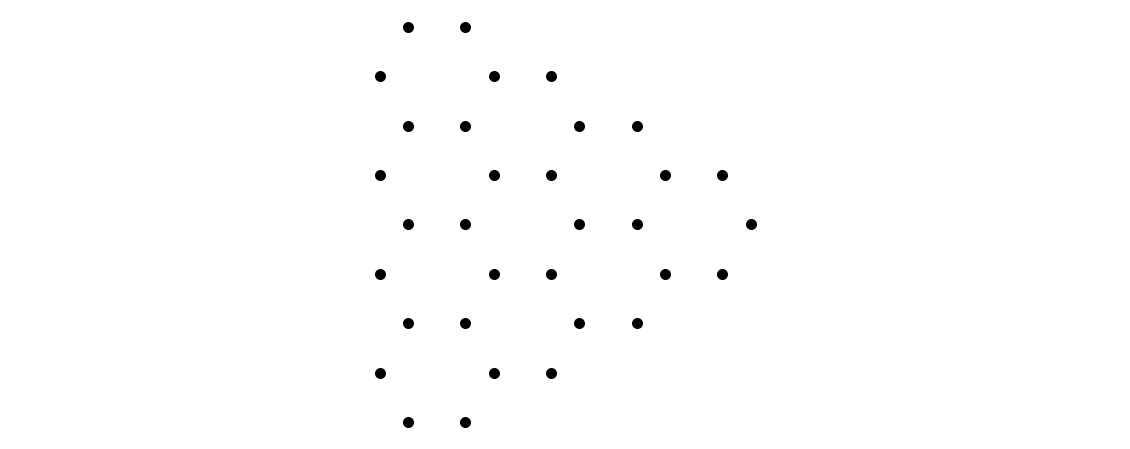

In [19]:
g = islands.get_geometry(name="honeycomb",nedges=3,n=2,rot=0.) # honeycomb quantum dot
h = g.get_hamiltonian() # get the Hamiltonian
plt.scatter(g.r[:,0],g.r[:,1],c="black",s=100) ; plt.axis("equal") ; plt.axis("off") 

Text(0, 0.5, 'Energy')

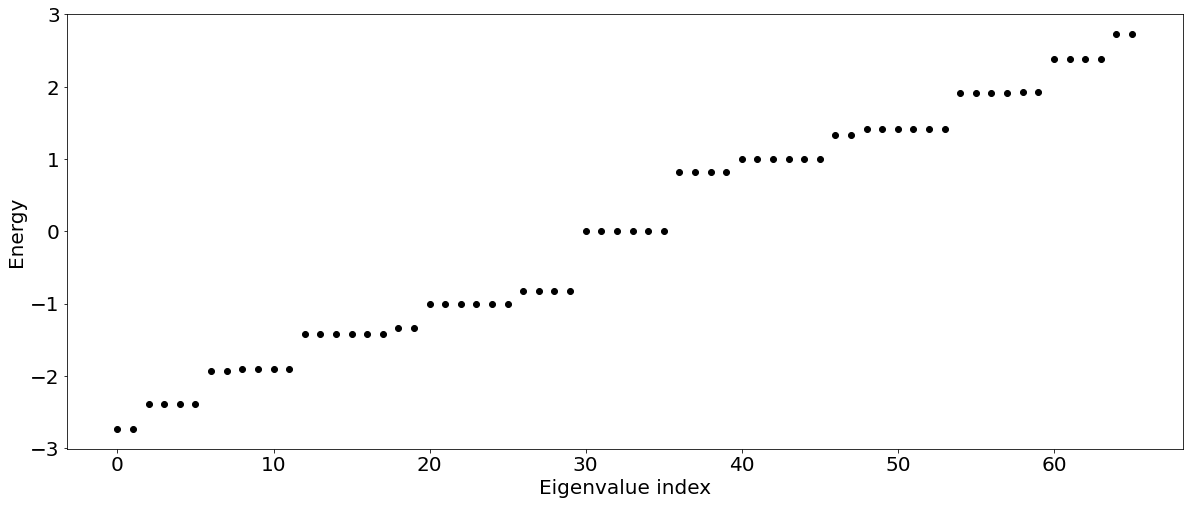

In [20]:
# now plot the eigenstates
(inds,es) = h.get_bands() # get the eigenenergies
plt.scatter(range(len(es)),es,c="black") ; plt.xlabel("Eigenvalue index") ; plt.ylabel("Energy") # plot
# note that there are now several zero modes!

(-2.8250000000000015,
 4.324999999999999,
 -3.810511776651531,
 3.8105117766515275)

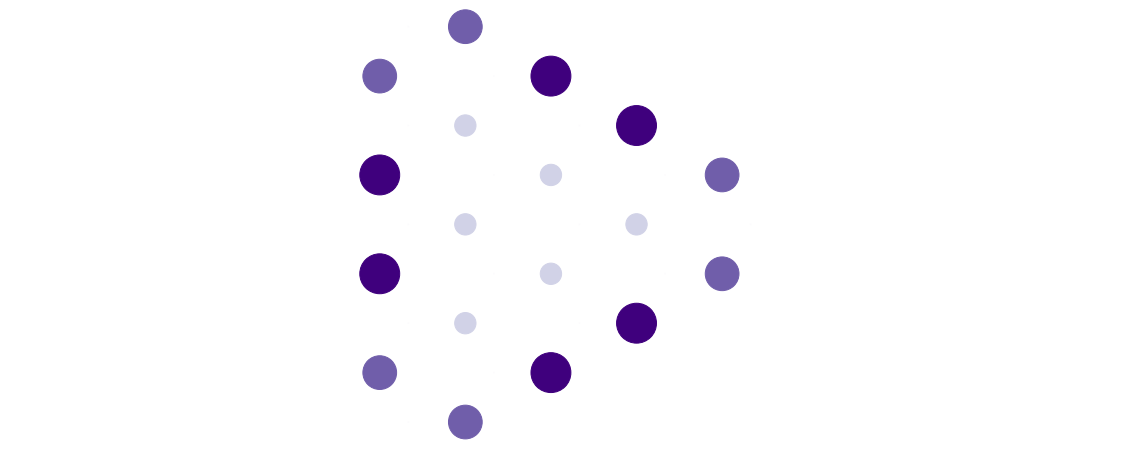

In [21]:
# now compute the LDOS at zero energy 
x,y,d = h.get_ldos(e=0.0,delta=1e-2) # get the LDOS
plt.scatter(x,y,c=d,s=np.array(d)*100,cmap="Purples") ; plt.axis("off") ; plt.axis("equal") 
# see that the zero modes are located at the edge

Text(0, 0.5, 'Energy')

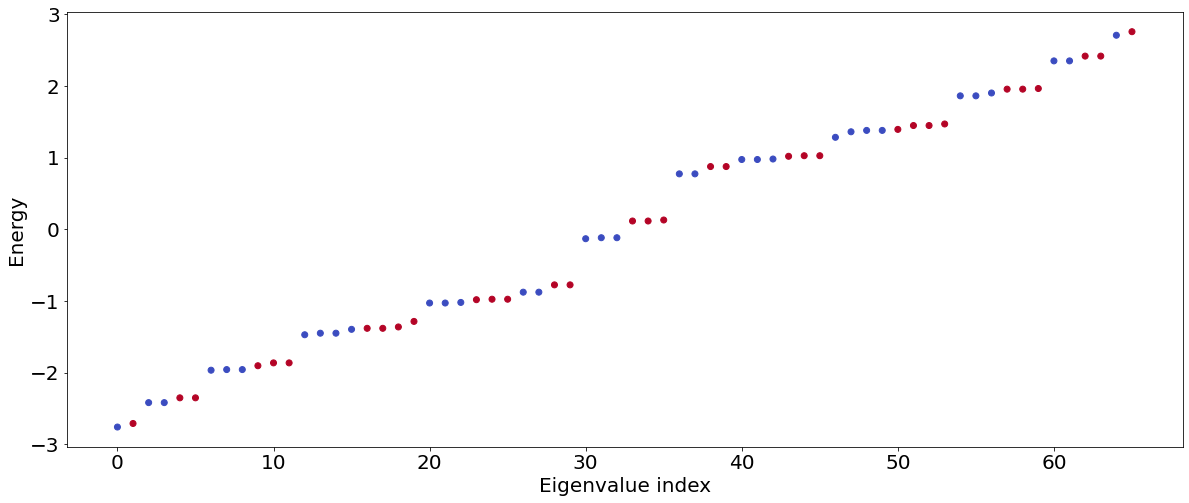

In [22]:
# now let us add interactions
hscf = h.get_mean_field_hamiltonian(U=1.0, filling=0.5,mf="ferro",mix=0.9) # solve mean-field Hamiltonian
(inds,es,sz) = hscf.get_bands(operator="sz") # get the eigenenergies
plt.scatter(range(len(es)),es,c=sz) ; plt.xlabel("Eigenvalue index") ; plt.ylabel("Energy") # plot
# note that there is now a splitting between the zero modes

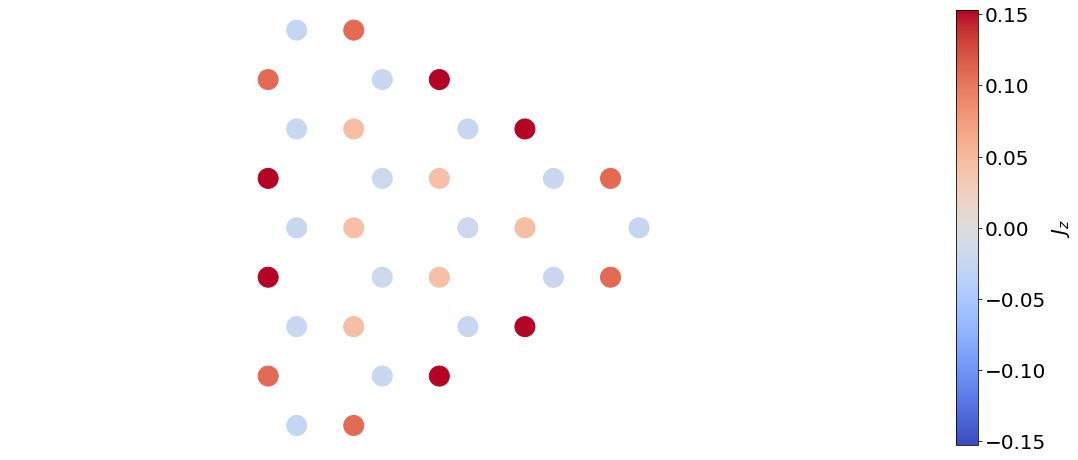

In [23]:
# now compute the LDOS at zero energy 
mz = hscf.get_magnetization()[:,2] # get the LDOS
plt.scatter(x,y,c=mz,s=400,vmin=-np.max(np.abs(mz)),vmax=np.max(np.abs(mz))) # plot the magnetization
plt.axis("off") ; plt.axis("equal") ; plt.colorbar(label="$J_z$") 
# show the self-consistent magnetization

### Exercise
- Create a bigger island with zigzag edges, and show that it still hosts zero modes
- Show that when including interactions, magnetization emerges at the edges in those bigger islands

## Interaction induced symmetry breaking in nanoribbons
We will now show that magnetic order can also appear at the edges of a graphene nanoribbon for a zigzag interface

(-18.576244911176197, 18.57624491117622, -9.35, 9.35)

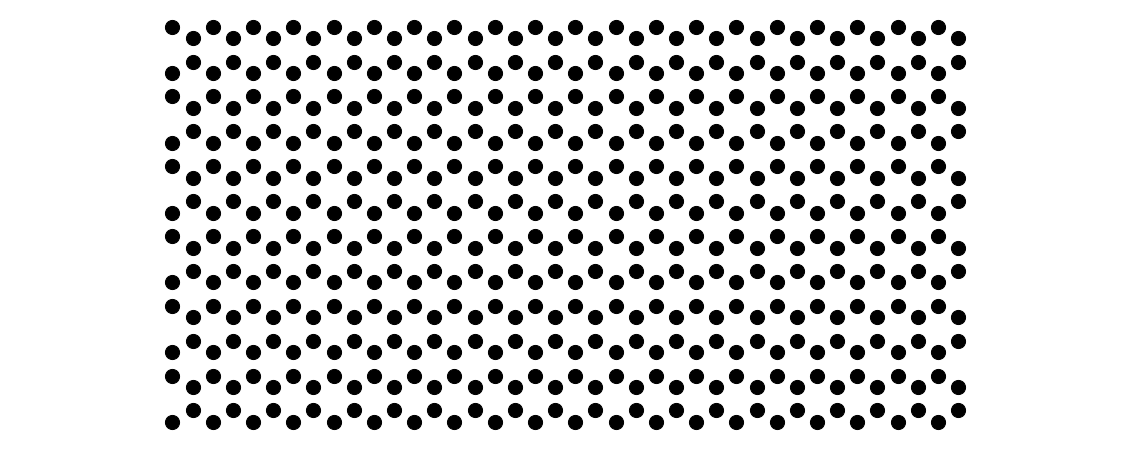

In [24]:
# create a zigzag nanoribbon
g = geometry.honeycomb_zigzag_ribbon(6) # generate a zigzag nanoribbon
gs = g.get_supercell(20) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

([], [])

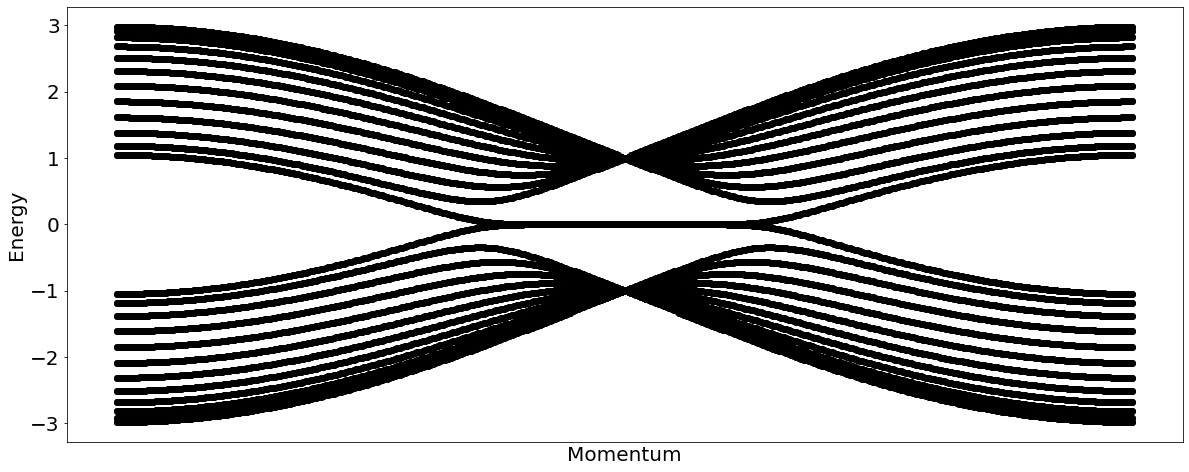

In [25]:
# now compute the band structure
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

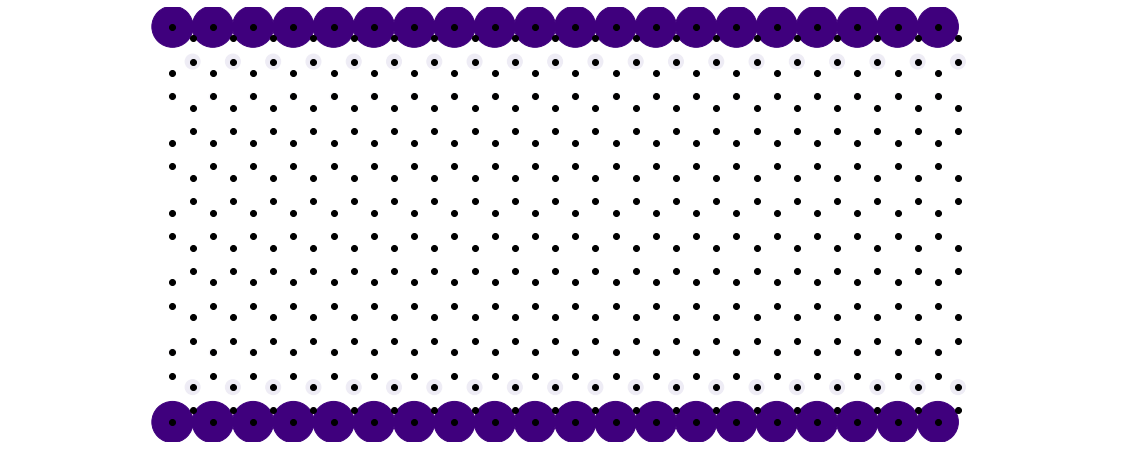

In [26]:
# now compute the LDOS at zero energy 
x,y,d = h.get_ldos(e=0.0,delta=1e-2,nrep=20) # get the LDOS
plt.scatter(x,y,c=d,s=np.array(d)*100,cmap="Purples") ; plt.axis("off") ; plt.axis("equal") # plot LDOS
plt.scatter(x,y,c="black") # plot lattice as a reference
# see that the zero modes are located at the edge

Text(0.5, 1.0, 'Antiferromagnetic')

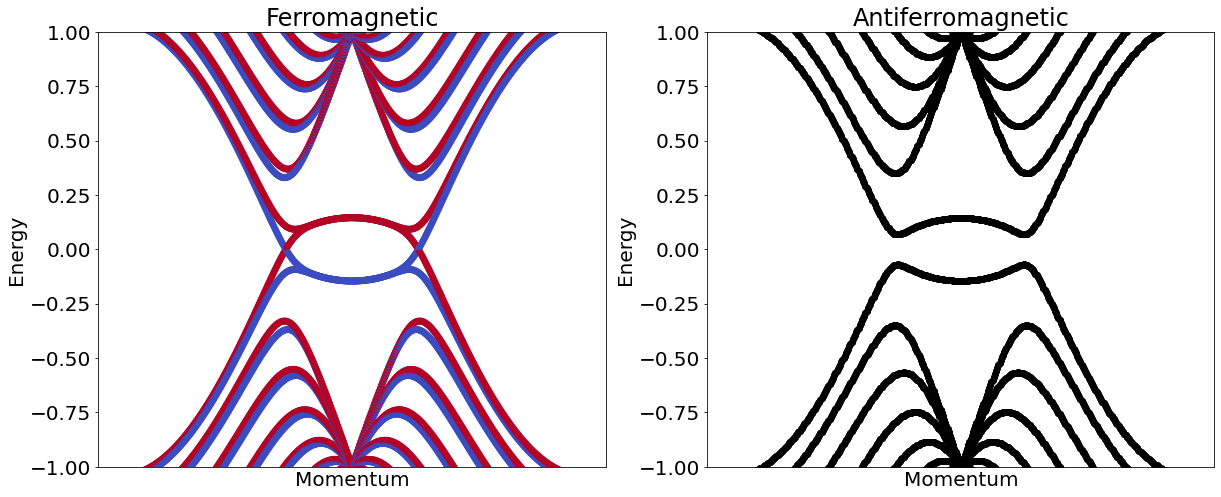

In [27]:
# now let us add interactions
# first with ferromagnetic initialization
plt.subplot(1,2,1)
hscf = h.get_mean_field_hamiltonian(U=1.0, filling=0.5,mf="ferro",mix=0.9) # solve mean-field Hamiltonian
(k,e,sz) = hscf.get_bands(operator="sz") # get the eigenenergies
plt.scatter(k,e,c=sz) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.ylim([-1.,1.]) ; plt.xticks([])
plt.title("Ferromagnetic")

# and later with antiferrromagnetic initialization
plt.subplot(1,2,2)
hscf = h.get_mean_field_hamiltonian(U=1.0, filling=0.5,mf="antiferro",mix=0.9) # solve mean-field Hamiltonian
(k,e) = hscf.get_bands() # get the eigenenergies
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.ylim([-1.,1.]) ; plt.xticks([]) 
plt.title("Antiferromagnetic")
# note that there is now a splitting between the zero modes

### Exercise
- We obtained two selfconsistent solutions,one FE and one AF, which one do you think that it is the ground state and why?